
https://www.kaggle.com/sogun3/uspollution

The AQS Data Mart is a database containing all of the information from AQS. It has every measured value the EPA 
has collected via the national ambient air monitoring program. It also includes the associated aggregate values 
calculated by EPA (8-hour, daily, annual, etc.). The AQS Data Mart is a copy of AQS made once per week and made 
accessible to the public through web-based applications. The intended users of the Data Mart are air quality data 
analysts in the regulatory, academic, and health research communities. It is intended for those who need to 
download large volumes of detailed technical data stored at EPA and does not provide any interactive analytical 
tools. It serves as the back-end database for several Agency interactive tools that could not fully function 
without it: AirData, AirCompare, The Remote Sensing Information Gateway, the Map Monitoring Sites KML page, etc.

AQS must maintain constant readiness to accept data and meet high data integrity requirements, thus is limited 
in the number of users and queries to which it can respond. The Data Mart, as a read only copy, can allow wider 
access.

47 states: District of Columbia, Country of Mexica
Missing ['Mississippi', 'Montana', 'Nebraska', 'Vermont', 'West Virginia']

Data was there, there were over about half the values were missing for the Air Quality Index for CO and SO2 but everythig else was there!  There were a few reading of negative values for the NO2 Mean, NO2 First Max Value, and SO2 Mean, SO2 First Max Value, CO Mean, 



The Clean Air Act requires EPA to set National Ambient Air Quality Standards (NAAQS)National Ambient Air Quality StandardsStandards established by EPA for maximum allowable concentrations of six "criteria" pollutants in outdoor air. This data set looks at four of the six pollutants are carbon monoxide, ground-level ozone, nitrogen dioxide, and sulfur dioxide. The standards are set at a level that protects public health with an adequate margin of safety. for six common air pollutants (also known as "criteria air pollutants"). These pollutants are found all over the U.S. They can harm your health and the environment, and cause property damage.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Reading in the data from https://www.kaggle.com/sogun3/uspollution
data = pd.read_csv('/home/slindhult/assignments/Capstone-1/Data/pollution_us_2000_2016.csv')

In [4]:
# Understanding the size of the dataframe
data.shape

(1746661, 29)

In [3]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [4]:
#Understanding the quality of the data by identifying null values
lst=[]

for col in data.columns:
    lst.append((col, data[col].isnull().sum()))
lst

[('Unnamed: 0', 0),
 ('State Code', 0),
 ('County Code', 0),
 ('Site Num', 0),
 ('Address', 0),
 ('State', 0),
 ('County', 0),
 ('City', 0),
 ('Date Local', 0),
 ('NO2 Units', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Units', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Units', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 872907),
 ('CO Units', 0),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 873323)]

In [5]:
#Understanding the quality of the data by identifying negative values and removing them
a = data.copy()
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >0).all(1)]


In [6]:
# Understanding what data is included - looks like some states are missing
states = data['State'].unique()
states_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
missing = [state for state in states_list if state not in states]
missing

['Guam',
 'Mississippi',
 'Montana',
 'Nebraska',
 'Puerto Rico',
 'Vermont',
 'West Virginia']

In [7]:
purged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936751 entries, 0 to 1746651
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         936751 non-null  int64  
 1   State Code         936751 non-null  int64  
 2   County Code        936751 non-null  int64  
 3   Site Num           936751 non-null  int64  
 4   Address            936751 non-null  object 
 5   State              936751 non-null  object 
 6   County             936751 non-null  object 
 7   City               936751 non-null  object 
 8   Date Local         936751 non-null  object 
 9   NO2 Units          936751 non-null  object 
 10  NO2 Mean           936751 non-null  float64
 11  NO2 1st Max Value  936751 non-null  float64
 12  NO2 1st Max Hour   936751 non-null  int64  
 13  NO2 AQI            936751 non-null  int64  
 14  O3 Units           936751 non-null  object 
 15  O3 Mean            936751 non-null  float64
 16  O

In [8]:
purged['month-day'] = purged['Date Local'].apply(lambda x: x[-5:]) 

/home/slindhult/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
#purged['Date Local']=pd.to_datetime(purged['Date Local'])

/home/slindhult/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
empty_list = []
for i in data.columns:
    empty_list.append((i, data[i].isnull().sum()))
empty_list

[('Unnamed: 0', 0),
 ('State Code', 0),
 ('County Code', 0),
 ('Site Num', 0),
 ('Address', 0),
 ('State', 0),
 ('County', 0),
 ('City', 0),
 ('Date Local', 0),
 ('NO2 Units', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Units', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Units', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 872907),
 ('CO Units', 0),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 873323)]

In [10]:
data.describe()

Unnamed: 0    State Code   County Code      Site Num      NO2 Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2 1st Max Value  NO2 1st Max Hour       NO2 AQI       O3 Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974e-02   
min        -2.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.300000e+01      5.000000e+00  1.200000e+01  1.787500e-02   
50%         2.400000e+01      9.000000e+00  2.300000e+01  2.587500e-02   
75%         3.570000e+01      2.000000e+01  3.300000e+01  3.391700e-02   
max         2.670000e+02      2.300000e+01  1.320000e+02  9.508300e-02   

       O3 1st Max Value  O3 1st Max Hour        O3 AQI      SO2 Mean  \
count      1.746661e+06     1.746661e+06  1.746661e+06  1.746661e+06   
mean       3.920331e-02     1.017053e+01  3.605012e+01  1.870364e+00   
std        1.534362e-02     4.003144e+00  1.978042e+01  2.760435e+00   
min        0.000000e+00     0.000000e+00  0.000000e+00 -2.000000e+00   
25%        2.900000e-02     9.000000e+00  2.500000e+01  2.565220e-01   
50%        3.800000e-02     1.000000e+01  3.300000e+01  9.875000e-01   
75%        4.800000e-02     1.100000e+01  4.200000e+01  2.325000e+00   
max        1.410000e-01     2.300000e+01  2.180000e+02  3.216250e+02   

       SO2 1st Max Value  SO2 1st Max Hour        SO2 AQI       CO Mean  \
count       1.746661e+06      1.746661e+06  873754.000000  1.746661e+06   
mean        4.492185e+00      9.664906e+00       7.115945  3.682177e-01   
std         7.679866e+00      6.731228e+00      11.937473  3.140231e-01   
min        -2.000000e+00      0.000000e+00       0.000000 -4.375000e-01   
25%         8.000000e-01      5.000000e+00       1.000000  1.834580e-01   
50%         2.000000e+00      8.000000e+00       3.000000  2.926250e-01   
75%         5.000000e+00      1.400000e+01       9.000000  4.666670e-01   
max         3.510000e+02      2.300000e+01     200.000000  7.508333e+00   

       CO 1st Max Value  CO 1st Max Hour         CO AQI  
count      1.746661e+06     1.746661e+06  873338.000000  
mean       6.201067e-01     7.875026e+00       5.996595  
std        6.439361e-01     7.978844e+00       5.851836  
min       -4.000000e-01     0.000000e+00       0.000000  
25%        2.920000e-01     0.000000e+00       2.000000  
50%        4.000000e-01     6.000000e+00       5.000000  
75%        8.000000e-01     1.300000e+01       8.000000  
max        1.990000e+01     2.300000e+01     201.000000

In [11]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [12]:
# Mean pollutants
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [13]:
s

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  \
State                                                                  
Alabama                9.989169          24.482632         14.961840   
Alaska                11.318102          21.826417         13.068556   
Arizona               20.675445          41.035565         16.371274   
Arkansas              10.636492          25.637365         13.984438   
California            16.848629          31.206154         12.437302   
Colorado              22.359849          42.356550         11.392362   
Connecticut           11.142933          23.948592         12.958507   
Country Of Mexico     22.091216          43.870928         13.987603   
Delaware              12.336231          24.915903         12.282507   
District Of Columbia  18.962657          35.248342         13.365150   
Florida                9.598434          22.273511         12.065532   
Georgia               12.605979          29.457710         16.578866   
Hawaii                 3.737845          11.218256          9.430962   
Idaho                  9.569125          27.152744         15.672558   
Illinois              16.939940          32.574949         14.120987   
Indiana               13.290962          28.743631         15.356312   
Iowa                   7.645630          17.937220         14.513549   
Kansas                12.927957          27.010800         13.867599   
Kentucky              13.668921          30.330308         15.415527   
Louisiana             15.290132          31.822628         13.837489   
Maine                  6.025429          14.314617         12.462905   
Maryland              11.222453          23.815936         12.556582   
Massachusetts         19.661480          33.610879         13.574911   
Michigan              18.263328          36.234472         13.922554   
Minnesota              7.642561          19.048529         13.005350   
Missouri              15.979104          33.112235         14.444304   
Nevada                16.306772          32.158883         11.569638   
New Hampshire          8.618626          18.389480         13.913577   
New Jersey            20.876097          37.368238         13.149649   
New Mexico            13.051169          27.858588         11.947185   
New York              20.907613          36.541885         14.164413   
North Carolina        11.906647          27.108071         15.133975   
North Dakota           5.724422          15.924063         13.368867   
Ohio                  13.505364          26.422854         11.622176   
Oklahoma               8.119494          19.599496         14.784598   
Oregon                10.324512          20.118537         13.512825   
Pennsylvania          14.322647          28.810434         13.771572   
Rhode Island           8.327208          18.338804         11.995549   
South Carolina         2.354756           6.191962          8.466667   
South Dakota           5.855104          14.599768         12.841360   
Tennessee              1.287983           2.964798         13.173767   
Texas                 14.291874          30.984895         13.252052   
Utah                  17.559942          32.294933         12.135328   
Virginia              12.107713          25.030829         13.242316   
Washington            10.718601          24.747237         14.108734   
Wisconsin             18.644187          33.921739         14.880435   
Wyoming                4.165169          13.065321         12.937486   

                        NO2 AQI   O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
State                                                                          
Alabama               22.649217  0.024615          0.039848         9.725049   
Alaska                20.312614  0.013075          0.019831        12.194698   
Arizona               38.588563  0.023516          0.042519        10.142301   
Arkansas              23.893754  0.025790          0.039670        10.509865   
California    

In [14]:
day = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI','month-day']].copy()

In [15]:
#Mean pollutant state and day
day_state = day.groupby(['State','month-day']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [16]:
byday = purged[[
       'month-day','NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [17]:
eachday = byday.groupby('month-day').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [18]:
eachday

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour    NO2 AQI  \
month-day                                                              
01-01      15.567392          28.106958         14.344175  26.440510   
01-02      19.622140          33.572614         15.167776  31.606303   
01-03      20.550025          34.697738         14.555928  32.635526   
01-04      21.813002          35.589449         14.178983  33.492525   
01-05      21.709007          35.907696         14.515047  33.753224   
...              ...                ...               ...        ...   
12-27      19.550605          33.375381         15.143649  31.459122   
12-28      20.725263          34.620817         14.955137  32.660386   
12-29      20.303367          34.223902         14.278537  32.173171   
12-30      20.084133          33.618894         14.546544  31.637788   
12-31      19.614124          33.700827         14.149747  31.758842   

            O3 Mean  O3 1st Max Value  O3 1st Max Hour     O3 AQI  SO2 Mean  \
month-day                                                                     
01-01      0.017695          0.027552        10.935364  24.010704  2.085025   
01-02      0.014292          0.024462        11.019530  21.324900  2.196288   
01-03      0.014126          0.023760        10.583578  20.645580  2.308416   
01-04      0.013236          0.023103        10.999573  20.093550  2.582718   
01-05      0.013779          0.023496        10.907567  20.420464  2.545893   
...             ...               ...              ...        ...       ...   
12-27      0.014139          0.024147        10.473441  20.916859  2.176191   
12-28      0.013934          0.023944        11.113504  20.700763  2.446499   
12-29      0.013395          0.023446        11.423415  20.319512  2.344389   
12-30      0.013747          0.023182        10.831797  20.048848  2.126714   
12-31      0.015472          0.023864         9.866789  20.685806  2.237334   

           SO2 1st Max Value  SO2 1st Max Hour   SO2 AQI   CO Mean  \
month-day                                                            
01-01               4.195801         10.571840  6.780822  0.532364   
01-02               4.750422         11.863293  7.512127  0.595233   
01-03               4.855090         11.949728  7.711555  0.635976   
01-04               5.384109         11.839385  8.551020  0.661163   
01-05               5.496174         12.095013  8.720036  0.654940   
...                      ...               ...       ...       ...   
12-27               4.864111         12.285912  7.673430  0.584054   
12-28               5.238268         11.924181  8.258185  0.642141   
12-29               4.986537         12.181951  7.895706  0.630770   
12-30               4.697097         11.855300  7.543078  0.619058   
12-31               4.784061         12.697290  7.507218  0.617059   

           CO 1st Max Value  CO 1st Max Hour     CO AQI  
month-day                                                
01-01              0.965207        11.604776   9.402239  
01-02              1.087300        13.948069  11.075258  
01-03              1.200082        13.621701  12.137390  
01-04              1.218289        12.304571  12.044852  
01-05              1.236530        13.117799  12.352098  
...                     ...              ...        ...  
12-27              1.081012        13.676212  10.857918  
12-28              1.166978        12.947510  12.107772  
12-29              1.161673        13.341951  11.912037  
12-30              1.134276        13.394009  11.718853  
12-31              1.178923        13.746899  11.871983  

[366 rows x 16 columns]

In [19]:
cols = eachday.columns

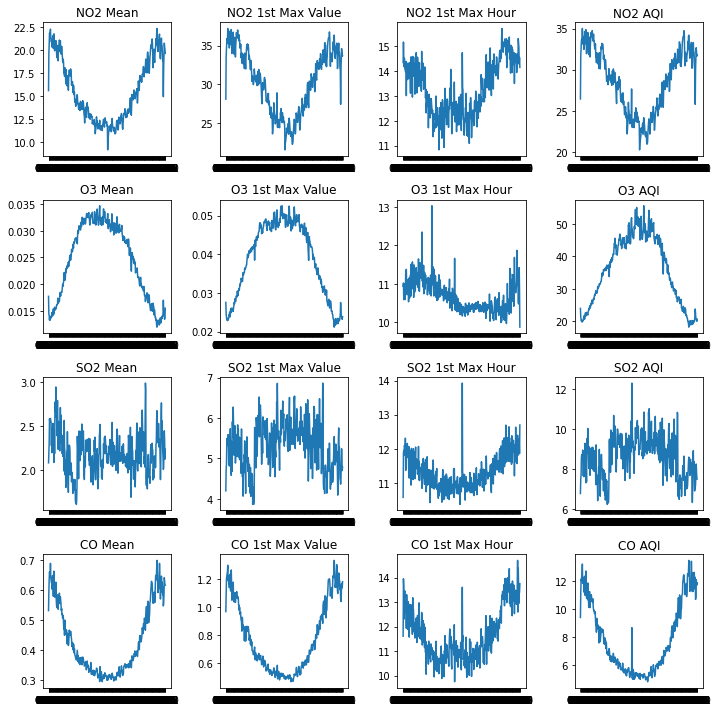

In [20]:
fig, axs = plt.subplots(4,4,figsize=(10,10))

axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].plot(eachday.index,eachday[col])
    axs[i].set_title(col)
fig.tight_layout()  


In [21]:
purged['year'] = purged['Date Local'].apply(lambda x: x[:4]) 

/home/slindhult/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
purged.head()

Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...  SO2 1st Max Value  SO2 1st Max Hour  \
0  2000-01-01  Parts per billion  ...                9.0                21   
1  2000-01-01  Parts per billion  ...                9.0                21   
2  2000-01-01  Parts per billion  ...                6.6                23   
3  2000-01-01  Parts per billion  ...                6.6                23   
4  2000-01-02  Parts per billion  ...                3.0                22   

   SO2 AQI           CO Units   CO Mean  CO 1st Max Value  CO 1st Max Hour  \
0     13.0  Parts per million  1.145833               4.2               21   
1     13.0  Parts per million  0.878947               2.2               23   
2      NaN  Parts per million  1.145833               4.2               21   
3      NaN  Parts per million  0.878947               2.2               23   
4      4.0  Parts per million  0.850000               1.6               23   

   CO AQI  month-day  year  
0     NaN      01-01  2000  
1    25.0      01-01  2000  
2     NaN      01-01  2000  
3    25.0      01-01  2000  
4     NaN      01-02  2000  

[5 rows x 31 columns]

In [23]:
year = purged[[
         'NO2 Mean', 'NO2 AQI',
       'O3 Mean','O3 AQI',
       'SO2 Mean','SO2 AQI',
        'CO Mean','CO AQI', 'year']].copy()

In [24]:
# Mean pollutants
y = year.groupby('year').agg({'NO2 Mean':'mean',
       'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO AQI':'mean'})

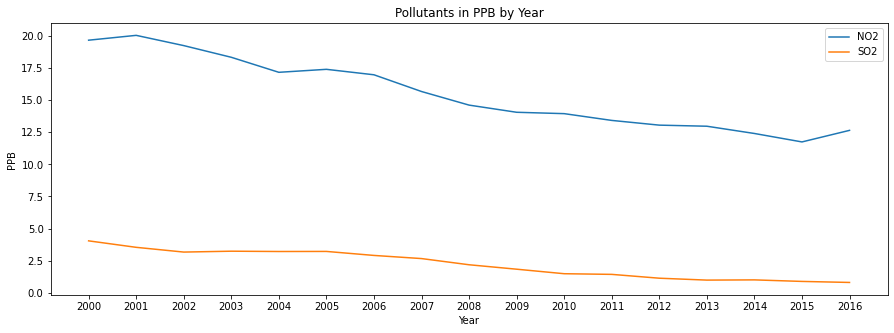

In [25]:
fig, ax = plt.subplots(figsize=(15,5))


  
ax.plot(y.index,y['NO2 Mean'], label='NO2')
ax.plot(y.index,y['SO2 Mean'], label='SO2')
ax.set_title('Pollutants in PPB by Year')
ax.set_xlabel('Year')
ax.set_ylabel('PPB')
ax.legend();



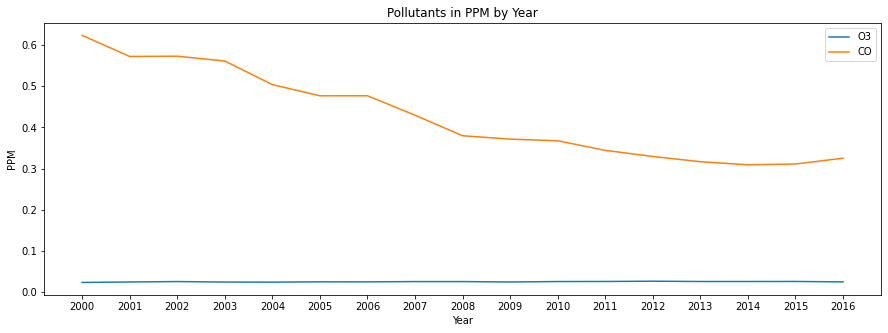

In [26]:
import numpy as np
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(y.index,y['O3 Mean'], label='O3')
ax.plot(y.index,y['CO Mean'], label='CO')
ax.set_xlabel('Year')
ax.set_ylabel('PPM')
ax.set_title('Pollutants in PPM by Year')

ax.legend();

In [30]:
purged['SO2 AQI Level'] = pd.cut(purged['SO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['NO2 AQI Level'] = pd.cut(purged['NO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['O3 AQI Level'] = pd.cut(purged['O3 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['CO AQI Level'] = pd.cut(purged['CO AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])


/home/slindhult/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/slindhult/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/slindhult/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [34]:
aqi = purged[['year','SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']]

In [36]:
test = aqi.agg({'SO2 AQI Level':'value_counts','NO2 AQI Level':'value_counts','O3 AQI Level':'value_counts','CO AQI Level':'value_counts'})

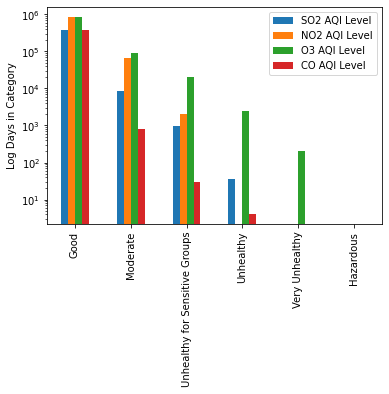

In [37]:
test.plot.bar();
plt.ylabel('Log Days in Category')
plt.yscale('log')